# Decision Tree Model
### Imports

In [1]:
import os
import json
import joblib
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

### Paths

In [2]:
DATA_DIR = "../data/splits"
MODEL_DIR = "../models/decision_tree"
os.makedirs(MODEL_DIR, exist_ok=True)

TRAIN_PATH = f"{DATA_DIR}/train.csv"
VAL_PATH   = f"{DATA_DIR}/val.csv"
TEST_PATH  = f"{DATA_DIR}/test.csv"

TARGET_COL = "target"
SEED = 42

### Loading Data

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
val_df   = pd.read_csv(VAL_PATH)
test_df  = pd.read_csv(TEST_PATH)

X_train = train_df.drop(columns=[TARGET_COL])
y_train = train_df[TARGET_COL]

X_val = val_df.drop(columns=[TARGET_COL])
y_val = val_df[TARGET_COL]

X_test = test_df.drop(columns=[TARGET_COL])
y_test = test_df[TARGET_COL]

print("Train:", X_train.shape)
print("Val  :", X_val.shape)
print("Test :", X_test.shape)

Train: (3096, 36)
Val  : (664, 36)
Test : (664, 36)


### Training Decision Tree

In [4]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=10,
    random_state=SEED
)

dt_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

### Validation Performance

In [5]:
val_preds = dt_model.predict(X_val)

val_acc = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", round(val_acc, 4))

print("\nClassification Report (Validation):")
print(classification_report(y_val, val_preds))

Validation Accuracy: 0.6928

Classification Report (Validation):
              precision    recall  f1-score   support

     Dropout       0.74      0.64      0.69       213
    Enrolled       0.37      0.34      0.35       119
    Graduate       0.76      0.85      0.81       332

    accuracy                           0.69       664
   macro avg       0.62      0.61      0.62       664
weighted avg       0.68      0.69      0.69       664



### Test Performance

In [6]:
test_preds = dt_model.predict(X_test)

test_acc = accuracy_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)

print("Test Accuracy:", round(test_acc, 4))
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report (Test):")
print(classification_report(y_test, test_preds))

Test Accuracy: 0.7319

Confusion Matrix:
[[148  39  27]
 [ 17  56  46]
 [ 18  31 282]]

Classification Report (Test):
              precision    recall  f1-score   support

     Dropout       0.81      0.69      0.75       214
    Enrolled       0.44      0.47      0.46       119
    Graduate       0.79      0.85      0.82       331

    accuracy                           0.73       664
   macro avg       0.68      0.67      0.67       664
weighted avg       0.74      0.73      0.73       664



### Saving Metrics

In [7]:
metrics = {
    "model": "DecisionTree",
    "accuracy": test_acc,
    "confusion_matrix": cm.tolist(),
    "classification_report": classification_report(
        y_test, test_preds, output_dict=True
    )
}

with open(f"{MODEL_DIR}/metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Metrics saved")

Metrics saved


### Saving Confusion Matrix

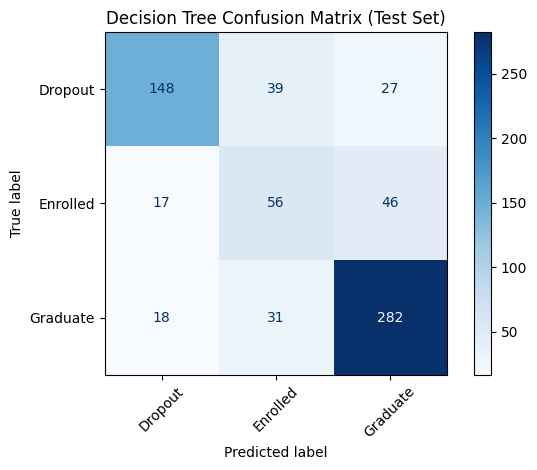

Saved: ../models/decision_tree/confusion_matrix.png


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_dt = confusion_matrix(y_test, test_preds)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_dt,
    display_labels=sorted(y_test.unique())
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Decision Tree Confusion Matrix (Test Set)")
plt.tight_layout()

dt_cm_path = "../models/decision_tree/confusion_matrix.png"
plt.savefig(dt_cm_path)
plt.show()

print("Saved:", dt_cm_path)

### Feature Importance

In [8]:
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": dt_model.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df.to_csv(
    f"{MODEL_DIR}/feature_importance.csv",
    index=False
)

importance_df.head(10)

,feature,importance
30,num__curricular_units_2nd_sem_approved,0.515377
14,cat__tuition_fees_up_to_date,0.063249
22,num__curricular_units_1st_sem_enrolled,0.048911
31,num__curricular_units_2nd_sem_grade,0.040845
29,num__curricular_units_2nd_sem_evaluations,0.037455
19,num__admission_grade,0.032219
18,num__previous_qualification_grade,0.026712
23,num__curricular_units_1st_sem_evaluations,0.025385
24,num__curricular_units_1st_sem_approved,0.024245
3,cat__course,0.023347


### Saving Model

In [9]:
joblib.dump(dt_model, f"{MODEL_DIR}/model.joblib")
print("Model saved")

Model saved
